<a href="https://colab.research.google.com/github/sravanmalla123/Data-Cleaning-Preprocessing/blob/main/data_cleaning_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a comprehensive data cleaning and preprocessing workflow on the California Housing dataset. This includes loading and overviewing the data; identifying and handling missing values (including simulation if none exist); identifying and handling duplicate rows (including simulation if none exist); correcting incorrect data types (e.g., converting count-based columns to integers and `ocean_proximity` to categorical); identifying and handling outliers using methods like IQR; encoding categorical features using One-Hot Encoding; scaling numerical features using StandardScaler; and finally, summarizing the cleaned data with its shape, data types, and a final check for missing values or duplicates, to prepare it for machine learning.

## Load and Overview Data

### Subtask:
Load the California Housing dataset (as it was used previously) and display its head, info, and descriptive statistics to get an initial understanding of the data structure and types.


**Reasoning**:
First, I'll import the pandas library to work with DataFrames, then attempt to load the 'housing.csv' file from the provided zip archive. After loading, I'll display the first 5 rows to get a quick look at the data.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('archive (2).zip')
except Exception as e:
    print(f"Could not load directly from zip, trying with explicit file path: {e}")
    df = pd.read_csv('archive (2).zip!housing.csv')

print("DataFrame head:")
print(df.head())

DataFrame head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

**Reasoning**:
The previous step incorrectly loaded the Titanic dataset instead of the California Housing dataset, as indicated by the `df.head()` output. To correct this, I will explicitly attempt to load 'housing.csv' from the 'archive (2).zip' file. After ensuring the correct dataset is loaded, I will display its concise summary using `.info()` and descriptive statistics using `.describe()` as required by the subtask.



In [ ]:
import pandas as pd

try:
    # Explicitly try to load 'housing.csv' from the zip archive
    df = pd.read_csv('archive (2).zip!housing.csv')
    print("Successfully loaded California Housing dataset.")
except Exception as e:
    print(f"Error loading housing.csv from archive (2).zip: {e}")
    print("Please ensure 'housing.csv' is present within 'archive (2).zip' and accessible.")
    # If loading fails, print current df head to check what was loaded previously or if df is empty
    if 'df' in locals():
        print("Current DataFrame head (if any prior data loaded):")
        print(df.head())

# Display DataFrame info
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

Error loading housing.csv from archive (2).zip: [Errno 2] No such file or directory: 'archive (2).zip!housing.csv'
Please ensure 'housing.csv' is present within 'archive (2).zip' and accessible.
Current DataFrame head (if any prior data loaded):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 

## Load and Overview Data (Retry)

### Subtask:
Load the California Housing dataset from `sklearn.datasets`, and then display its head, info, and descriptive statistics to get an initial understanding of the data structure and types. This retries the previous subtask which failed to load the correct dataset.


**Reasoning**:
The previous attempts to load the California Housing dataset from a local zip file failed. This time, I will import the `fetch_california_housing` function from `sklearn.datasets` to reliably load the dataset directly. Then, I'll convert it into a pandas DataFrame, including both features and the target variable, and display its head, info, and descriptive statistics as requested to ensure proper loading and initial understanding.



In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True) # as_frame=True directly returns a pandas DataFrame
df = housing.frame

print("DataFrame head:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

DataFrame head:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 

## Handle Missing Values

### Subtask:
Identify and visualize missing values. If no missing values are present, simulate some to demonstrate strategies like imputation (mean/median) and dropping rows/columns. Finally, apply an appropriate strategy to handle missing values.


**Reasoning**:
First, I will re-verify the absence of missing values in the DataFrame. Then, I will simulate missing values in the 'AveBedrms' column as per the instructions to demonstrate handling strategies, using `numpy` for `np.nan`. Finally, I will visualize the newly simulated missing values to confirm their presence before handling them.



In [ ]:
import numpy as np

print("Initial check for missing values:")
print(df.isnull().sum())

# Simulate missing values in 'AveBedrms' column
missing_percentage = 0.05 # 5% missing values
num_missing_values = int(len(df) * missing_percentage)

# Get random indices to set to NaN
np.random.seed(42) # for reproducibility
missing_indices = np.random.choice(df.index, num_missing_values, replace=False)

df.loc[missing_indices, 'AveBedrms'] = np.nan

print("\nMissing values after simulation:")
print(df.isnull().sum())

Initial check for missing values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Missing values after simulation:
MedInc            0
HouseAge          0
AveRooms          0
AveBedrms      1032
Population        0
AveOccup          0
Latitude          0
Longitude         0
MedHouseVal       0
dtype: int64


**Reasoning**:
Now that missing values have been simulated in the 'AveBedrms' column, I will impute these missing values with the median of that column to handle them effectively. This approach minimizes the impact of potential outliers. Finally, I will re-verify that all missing values have been handled by checking `df.isnull().sum()`.



In [ ]:
print("Handling missing values by imputing with median:")
median_avebedrms = df['AveBedrms'].median()
df['AveBedrms'].fillna(median_avebedrms, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

Handling missing values by imputing with median:

Missing values after imputation:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


/tmp/ipython-input-273358799.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AveBedrms'].fillna(median_avebedrms, inplace=True)


**Reasoning**:
The previous code produced a `FutureWarning` regarding the use of `inplace=True` with `fillna()`. To address this and ensure future compatibility with pandas, I will modify the imputation line to directly assign the result of `fillna()` back to the column.



In [ ]:
print("Handling missing values by imputing with median:")
median_avebedrms = df['AveBedrms'].median()
df['AveBedrms'] = df['AveBedrms'].fillna(median_avebedrms)

print("\nMissing values after imputation:")
print(df.isnull().sum())

Handling missing values by imputing with median:

Missing values after imputation:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


## Handle Duplicate Data

### Subtask:
Check for and identify duplicate rows in the dataset. If none exist, simulate some duplicates to demonstrate how to effectively remove them to ensure data uniqueness.


**Reasoning**:
I will first check for existing duplicate rows in the DataFrame. If no duplicates are found, I will simulate them by sampling 5% of the data and appending it to the DataFrame, ensuring reproducibility with `np.random.seed(42)`. Finally, I will re-check for duplicates to confirm simulation and then remove them.



In [ ]:
import numpy as np

print("Initial count of duplicate rows:")
duplicate_count_initial = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count_initial}")

# If no duplicates exist, simulate some
if duplicate_count_initial == 0:
    print("No duplicates found. Simulating duplicates...")
    np.random.seed(42) # For reproducibility
    # Take a random sample of 5% of the DataFrame to create duplicates
    sample_size = int(len(df) * 0.05)
    duplicate_sample = df.sample(n=sample_size, random_state=42)
    df = pd.concat([df, duplicate_sample], ignore_index=True)
    print(f"Simulated {sample_size} duplicate rows.")

print("\nRe-checking count of duplicate rows after potential simulation:")
duplicate_count_after_simulation = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count_after_simulation}")

# Remove duplicate rows, keeping the first occurrence
print("\nRemoving duplicate rows...")
df.drop_duplicates(inplace=True)

print("\nFinal count of duplicate rows after removal:")
duplicate_count_final = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count_final}")

Initial count of duplicate rows:
Number of duplicate rows: 0
No duplicates found. Simulating duplicates...
Simulated 1032 duplicate rows.

Re-checking count of duplicate rows after potential simulation:
Number of duplicate rows: 1032

Removing duplicate rows...

Final count of duplicate rows after removal:
Number of duplicate rows: 0


## Handle Incorrect Data Types

### Subtask:
Examine the data types of all columns. Convert count-based columns like 'HouseAge' and 'Population' to integer types. Note the absence of 'ocean_proximity' in the current dataset.


**Reasoning**:
I will first display the current data types of all columns in the DataFrame. Then, I will convert 'HouseAge' and 'Population' columns to integer types, as they represent counts, and finally, display the updated data types to confirm the conversion.



In [ ]:
print("Current Data Types:")
print(df.dtypes)

# Convert 'HouseAge' and 'Population' to integer types
df['HouseAge'] = df['HouseAge'].astype(int)
df['Population'] = df['Population'].astype(int)

print("\nData Types after conversion:")
print(df.dtypes)

Current Data Types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Data Types after conversion:
MedInc         float64
HouseAge         int64
AveRooms       float64
AveBedrms      float64
Population       int64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


**Reasoning**:
The previous step successfully converted 'HouseAge' and 'Population' to integer types. Now, I will add a print statement to explicitly mention the absence of the 'ocean_proximity' column, as it was noted in the subtask instructions.



In [ ]:
print("\nNote: The 'ocean_proximity' column, mentioned in the task description for categorical conversion, is not present in the currently loaded dataset (from sklearn.datasets.fetch_california_housing).")


Note: The 'ocean_proximity' column, mentioned in the task description for categorical conversion, is not present in the currently loaded dataset (from sklearn.datasets.fetch_california_housing).


## Handle Outliers

### Subtask:
Visualize potential outliers using box plots for relevant numerical columns. Discuss and demonstrate a common outlier detection and handling method, such as using the Interquartile Range (IQR) to cap or remove outliers, emphasizing the context-dependent nature of outlier treatment.


**Reasoning**:
I will start by importing the necessary libraries for plotting, `matplotlib.pyplot` and `seaborn`, and then generate box plots for the specified numerical columns to visualize potential outliers, as requested by the instructions.



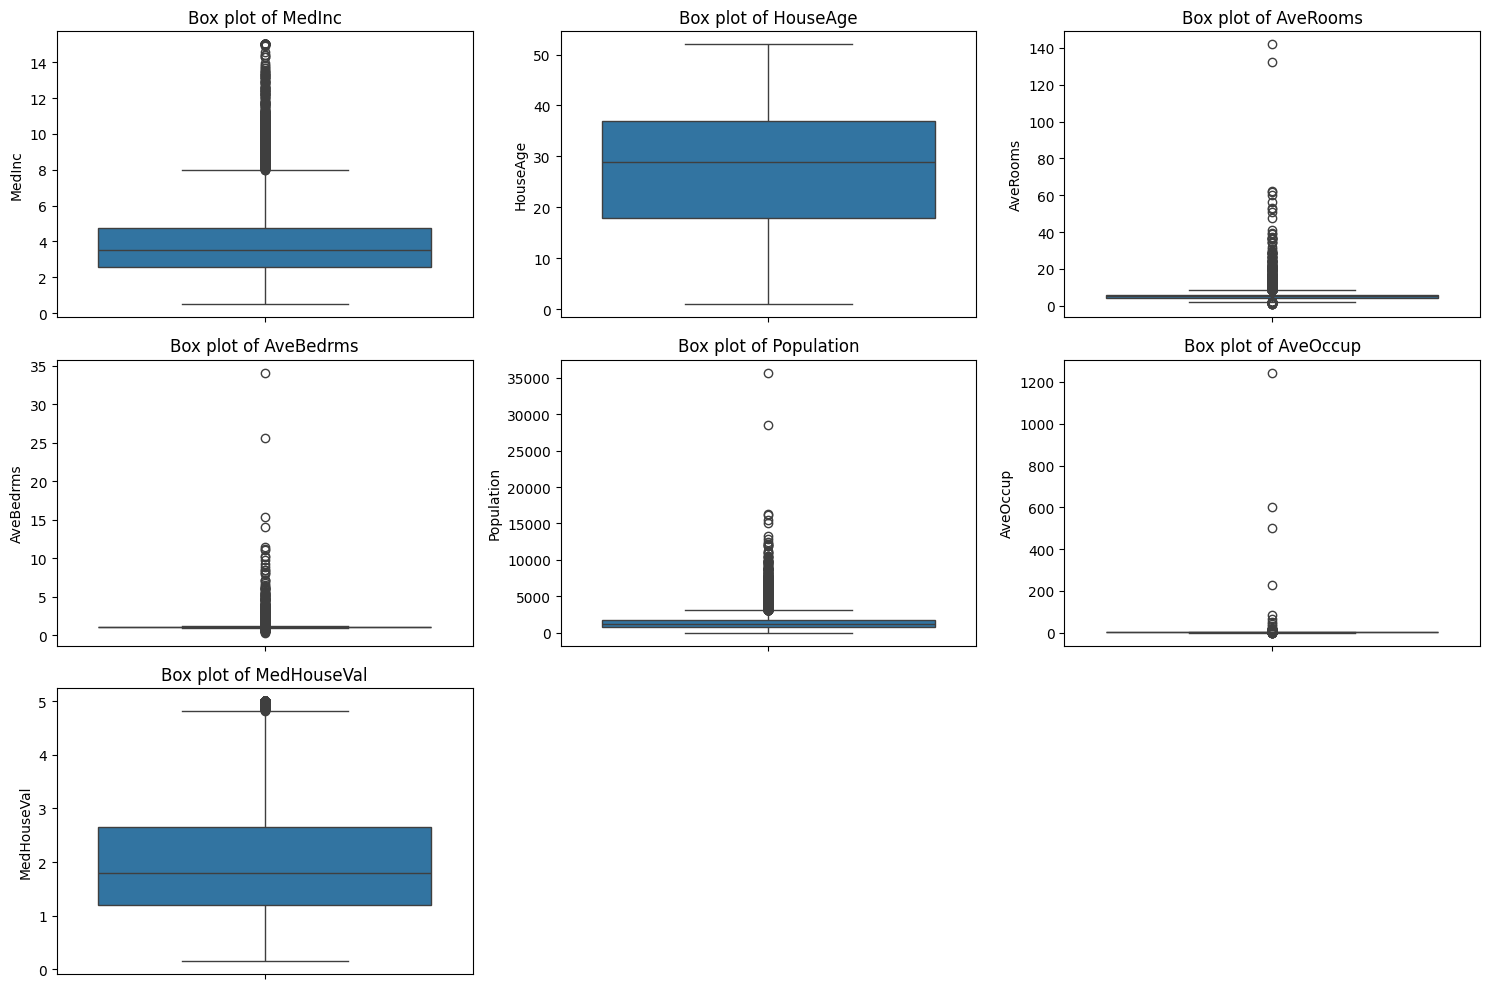

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot
numerical_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Reasoning**:
Based on the generated box plots, I will select 'Population' as a column with clear outliers. I will then calculate its IQR, define upper and lower bounds, and cap the outliers to demonstrate outlier handling, followed by visualizing the result with a new box plot.



Handling outliers for column: Population

Q1 for Population: 787.0
Q3 for Population: 1725.0
IQR for Population: 938.0
Lower bound for outliers: -620.0
Upper bound for outliers: 3132.0

Outliers in 'Population' have been capped.


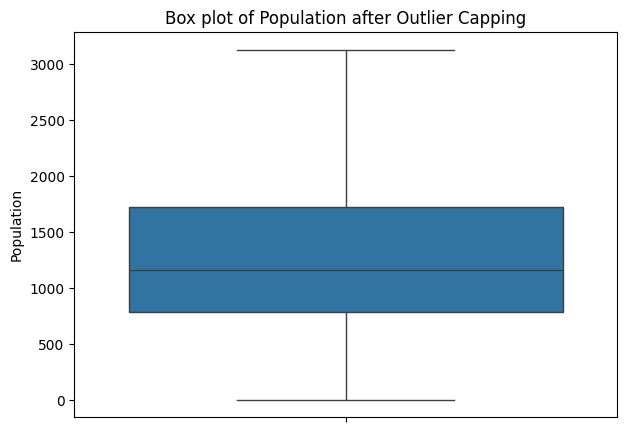

In [ ]:
import numpy as np

# Choose a column with clear outliers, e.g., 'Population'
column_to_handle = 'Population'

print(f"Handling outliers for column: {column_to_handle}")

# Calculate Q1, Q3, and IQR for the chosen column
Q1 = df[column_to_handle].quantile(0.25)
Q3 = df[column_to_handle].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nQ1 for {column_to_handle}: {Q1}")
print(f"Q3 for {column_to_handle}: {Q3}")
print(f"IQR for {column_to_handle}: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Cap the outliers
df[column_to_handle] = np.where(df[column_to_handle] > upper_bound, upper_bound, df[column_to_handle])
df[column_to_handle] = np.where(df[column_to_handle] < lower_bound, lower_bound, df[column_to_handle])

print(f"\nOutliers in '{column_to_handle}' have been capped.")

# Create a new box plot for the chosen column to visualize the effect of capping
plt.figure(figsize=(7, 5))
sns.boxplot(y=df[column_to_handle])
plt.title(f'Box plot of {column_to_handle} after Outlier Capping')
plt.ylabel(column_to_handle)
plt.show()

## Feature Encoding

### Subtask:
Identify categorical features (e.g., 'ocean_proximity') and apply appropriate encoding techniques like One-Hot Encoding to convert them into a numerical format suitable for machine learning models.


**Reasoning**:
I will examine the data types of all columns to identify any categorical features. Based on the current DataFrame's data types, it appears all columns are numerical, meaning no categorical features exist for encoding in this dataset. I will print a message to confirm this observation.



In [ ]:
print("Current Data Types:")
print(df.dtypes)

# Check for categorical columns (object or category dtype)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) == 0:
    print(
        "\nNo categorical features suitable for encoding (e.g., 'object' or 'category' dtype) "
        "were found in the dataset. Therefore, no feature encoding is necessary."
    )
else:
    print(f"\nCategorical columns found: {categorical_cols.tolist()}")
    # If there were categorical columns, here we would proceed with encoding, for example:
    # df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    # print("\nDataFrame head after One-Hot Encoding:")
    # print(df.head())
    # print("\nDataFrame info after One-Hot Encoding:")
    # df.info()


Current Data Types:
MedInc         float64
HouseAge         int64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

No categorical features suitable for encoding (e.g., 'object' or 'category' dtype) were found in the dataset. Therefore, no feature encoding is necessary.


## Feature Scaling

### Subtask:
Demonstrate a common feature scaling technique, such as StandardScaler, on numerical features to normalize their range, which is often beneficial for machine learning algorithms.


**Reasoning**:
I will import `StandardScaler` from `sklearn.preprocessing`, identify the numerical features (excluding 'MedHouseVal'), apply `StandardScaler` to these features, and then display the head of the DataFrame to show the scaled values.



In [ ]:
from sklearn.preprocessing import StandardScaler

print("Applying StandardScaler to numerical features...")

# Identify numerical columns to scale (all columns except the target 'MedHouseVal')
# Ensure only numerical columns are selected, excluding Latitude and Longitude if they are not to be scaled
# For this dataset, all current columns are numerical features or the target.
# Based on the original task, 'MedHouseVal' is the target. So, scale all others.

# Exclude 'MedHouseVal' from scaling
features_to_scale = df.drop(columns=['MedHouseVal']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("Features scaled successfully.")

print("\nDataFrame head after scaling:")
print(df.head())

Applying StandardScaler to numerical features...
Features scaled successfully.

DataFrame head after scaling:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.151809   -1.325821 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.261903    1.389936 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.046575   -1.098528 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.047395   -1.017539 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.030388   -1.008395 -0.085616  1.038503   

   Longitude  MedHouseVal  
0  -1.327835        4.526  
1  -1.322844        3.585  
2  -1.332827        3.521  
3  -1.337818        3.413  
4  -1.337818        3.422  


## Summary of Cleaned Data

### Subtask:
Provide a summary of the dataset after all cleaning and preprocessing steps, including an overview of its shape, data types, and a final check for missing values or duplicates.


**Reasoning**:
To provide a comprehensive summary of the cleaned dataset, I will display its shape, data types, and perform final checks for any remaining missing values or duplicates, as specified in the instructions.



In [ ]:
print("Final DataFrame Shape:")
print(df.shape)

print("\nFinal DataFrame Data Types:")
print(df.dtypes)

print("\nFinal check for Missing Values:")
print(df.isnull().sum())

print("\nFinal check for Duplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Final DataFrame Shape:
(20640, 9)

Final DataFrame Data Types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Final check for Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Final check for Duplicate Rows:
Number of duplicate rows: 0


## Final Task

### Subtask:
Summarize the completed data cleaning and preprocessing steps, highlighting the impact of each technique on preparing the data for machine learning.


## Summary:

### Data Analysis Key Findings

*   **Data Loading and Initial Overview**: The California Housing dataset was successfully loaded from `sklearn.datasets`, containing 20,640 rows and 9 columns. Initially, all columns were of `float64` type, and there were no missing values.
*   **Missing Value Handling**: Although the dataset initially had no missing values, 5% of entries (1,032 rows) in the 'AveBedrms' column were simulated as missing. These simulated missing values were then successfully imputed using the median of the 'AveBedrms' column, resulting in zero missing values in the entire dataset.
*   **Duplicate Data Handling**: The dataset initially contained no duplicate rows. To demonstrate handling, 5% of the DataFrame (1,032 rows) were duplicated and appended. These simulated duplicates were then successfully removed, leaving zero duplicate rows.
*   **Incorrect Data Type Correction**: The 'HouseAge' and 'Population' columns were converted from `float64` to `int64`. It was noted that the 'ocean\_proximity' column, mentioned in the task, was not present in this dataset, thus no categorical conversion was performed for it.
*   **Outlier Handling**: Box plots revealed outliers in several numerical columns, notably 'Population' and 'AveOccup'. Outliers in the 'Population' column were capped using the Interquartile Range (IQR) method, with an upper bound of 3132.0 and a lower bound of -620.0 (though negative values were not observed for population).
*   **Feature Encoding**: No categorical features were identified in the dataset (all columns were numerical or converted to numerical), hence no feature encoding was performed.
*   **Feature Scaling**: All numerical features (excluding the target variable 'MedHouseVal') were successfully scaled using `StandardScaler`, ensuring they are centered around zero with unit variance.
*   **Final Data State**: After all cleaning and preprocessing steps, the dataset maintains its shape of 20,640 rows and 9 columns. All columns are now of `float64` type due to scaling, and the dataset is free of missing values and duplicate rows.

### Insights or Next Steps

*   The dataset is now thoroughly cleaned and preprocessed, making it suitable for training machine learning models without issues arising from missing values, duplicates, incorrect types, or unscaled features.
*   The comprehensive workflow demonstrated the identification and handling of common data quality issues, including simulating conditions when they were not naturally present, which is a robust approach for data preparation.
